<a href="https://colab.research.google.com/github/EZ-Parking/LPR_testing/blob/master/ML_for_character_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow keras numpy mnist matplotlib

In [ ]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential ## ANN architecture
from keras.layers import Dense
from keras.utils import to_categorical 


In [ ]:
# Load the data-set
train_images= mnist.train_images()
train_labels  = mnist.train_labels()

# Load the data-set
test_images= mnist.test_images()
test_labels  = mnist.test_labels()

In [ ]:
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


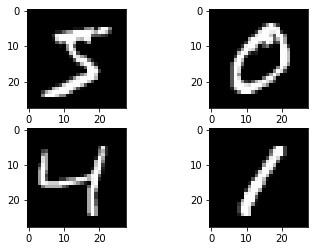

In [ ]:
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
## Normalize the pixel values
train_images = train_images/225- 0.5
test_images = test_images/225 - 0.5


In [ ]:
train_images1 = train_images.reshape((-1,784))
test_images1 = test_images.reshape((-1,784))

In [ ]:
print(train_images1.shape, test_images1.shape)

(60000, 784) (10000, 784)


In [ ]:
## ANN Model 
model = Sequential()
model.add(Dense(64,activation='relu', input_dim= 784))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
#complite the model 
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
## Train the model 
model.fit(
    train_images1,
    to_categorical(train_labels),
    epochs = 5,
    batch_size = 32
)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3531 - accuracy: 0.8937
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1767 - accuracy: 0.9459
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1369 - accuracy: 0.9581
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1147 - accuracy: 0.9647
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1017 - accuracy: 0.9681


In [ ]:
## Save the model in disk
#model.save_weights("model.h5")

In [ ]:
predict = model.predict(test_images1[0:5])
print(predict)

[[2.2083636e-06 5.6322322e-05 3.1422908e-04 1.1665989e-03 6.5768291e-10
  2.0519728e-06 1.9501194e-14 9.9841189e-01 3.1755053e-07 4.6318346e-05]
 [1.5619500e-09 2.2634628e-04 9.9928838e-01 4.8286148e-04 5.4040687e-12
  2.1245530e-06 1.6156960e-07 2.7405378e-10 2.0333762e-07 4.5299306e-13]
 [5.6551505e-07 9.8341691e-01 1.3928391e-02 7.9932966e-04 3.1810527e-05
  3.3430094e-04 9.7911674e-05 9.5804728e-04 4.2964105e-04 3.1059401e-06]
 [9.8855048e-01 8.1592907e-06 3.8115520e-04 1.4622693e-04 1.6089197e-04
  9.0324814e-03 4.0912014e-04 4.2082381e-04 1.0488423e-05 8.8023162e-04]
 [3.4518782e-06 1.7070226e-07 1.0963441e-06 6.4382184e-09 9.9862707e-01
  1.2765801e-06 1.3474889e-06 8.0049431e-06 1.3677790e-07 1.3574178e-03]]


In [ ]:
print(np.argmax(predict,axis=1))

[7 2 1 0 4]


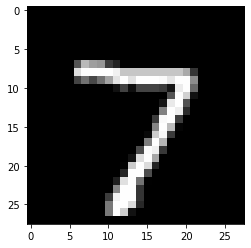

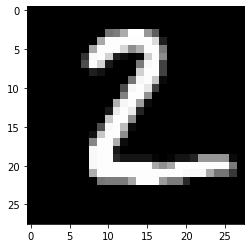

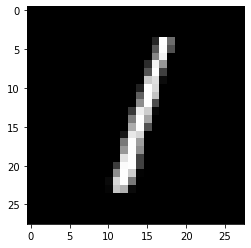

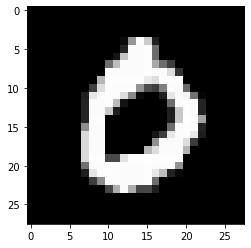

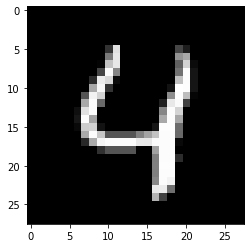

In [ ]:
for i in range (0,5):
  image = test_images1[i]
  image = np.array(image, dtype='float')
  pixel = image.reshape(28,28)
  plt.imshow(pixel, cmap='gray')
  plt.show()

In [ ]:
from keras.preprocessing.image import load_img
# load the image
img = load_img('/content/0.bmp')
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image


<class 'PIL.Image.Image'>
None
RGB
(20, 32)


In [ ]:
img.show()

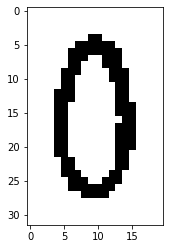

In [ ]:
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# img = load_img('/content/0.bmp')

# pixel = np.array(img. getdata())

# pixel = pixel/225- 0.5

# pixel = pixel.reshape((-1,784))



In [ ]:
from PIL import Image
image = Image.open('/content/0.bmp')
image=image.thumbnail((28, 28), Image.ANTIALIAS)





In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array

target_size = (28, 28)
image = load_img('/content/0.bmp', target_size=target_size)
	# Convert the image pixels to a numpy array
pix = img_to_array(image)
pix = pix/225 - 0.5
print(pix.shape)
	# Reshape data for the model
pix = pix.reshape((-1,784))

print(len(pix))
print(pix.shape)

predict1 = model.predict(pix)

print(np.argmax(predict1,axis=1))

(28, 28, 3)
3
(3, 784)
[2 3 3]


In [ ]:
pix = img_to_array(image)
k=pix.flatten()
len(k) 

2352

In [ ]:
from PIL import Image

user_test = '/content/1.bmp'
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("/content/bw_image.jpg")

640


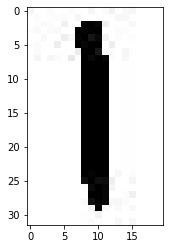

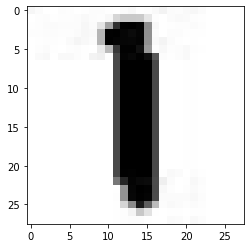

In [ ]:
import cv2
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()



640


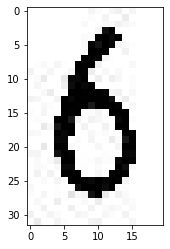

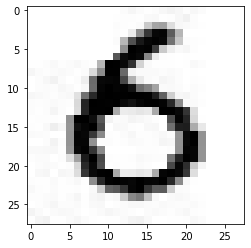

(28, 28, 1)
[5]


In [ ]:
from PIL import Image

user_test = '/content/6.bmp'
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("/content/bw_image6.jpg")


img_array = cv2.imread("/content/bw_image6.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()

pix = img_to_array(new_array)
pix = pix/225 - 0.5
print(pix.shape)
	# Reshape data for the model
pix = pix.reshape((-1,784))
predict1 = model.predict(pix)

print(np.argmax(predict1,axis=1))

640


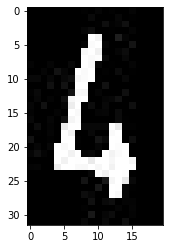

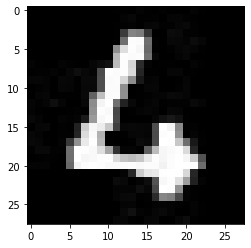

(28, 28, 1)
[7]


In [ ]:
from PIL import Image

user_test = '/content/4.bmp'
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 225 if x<100 else 0, '1')
bw.save("/content/bw_image4.jpg")


img_array = cv2.imread("/content/bw_image4.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()

pix = img_to_array(new_array)
pix = pix/225 - 0.5
print(pix.shape)
	# Reshape data for the model
pix = pix.reshape((-1,784))
predict1 = model.predict(pix)

print(np.argmax(predict1,axis=1))

640


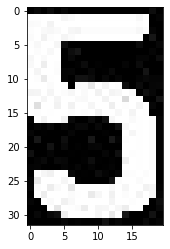

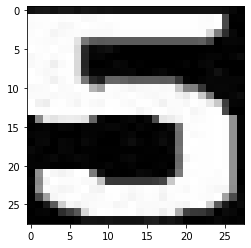

(28, 28, 1)
[2]


In [ ]:
from PIL import Image

user_test = '/content/5.bmp'
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 255 if x<200 else 0, '1')
bw.save("/content/bw_image5.jpg")


img_array = cv2.imread("/content/bw_image5.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()

pix = img_to_array(new_array)
pix = pix/225 - 0.5
print(pix.shape)
	# Reshape data for the model
pix = pix.reshape((-1,784))
predict1 = model.predict(pix)

print(np.argmax(predict1,axis=1))

In [ ]:
from PIL import Image
import cv2 
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array


user_test = '/content/test7.png'
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 255 if x<100 else 0, '1')
bw.save("/content/test_7.jpg")


img_array = cv2.imread("/content/test_7.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()

pix = img_to_array(new_array)
pix = pix/225 - 0.5
print(pix.shape)
	# Reshape data for the model
pix = pix.reshape((-1,784))
predict1 = model.predict(pix)

print(np.argmax(predict1,axis=1))

## **Part2 Segemtation**

In [ ]:
!pip install opencv-python

In [ ]:
from PIL import Image
import cv2 
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
## Reading the image
image_path = "/content/P1010002.jpg"
img = cv2.imread(image_path)

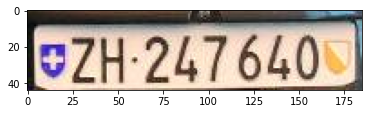

In [ ]:
plt.imshow(img)
plt.show()

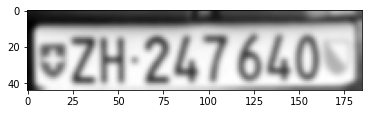

In [ ]:
# convert to grayscale and blur the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),0)


plt.imshow(blur, cmap="gray")
plt.show()

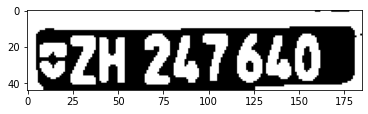

In [ ]:
binary = cv2.threshold(blur, 180, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)

plt.imshow(thre_mor, cmap="gray")
plt.show()

## Determine contour

### contours is simply curve joining all continuous point (along the boundary) sharing the same color and intensity

we will use findContours function of OpenCV to identify the coordinates of license character. 
This function is based on a simple theory: contours is simply curve joining all continuous point (along the boundary) sharing the same color and intensity.


Since we know that our license character usually have greater height than width, we can filter the irrelevant contours by select only contours with ratio between 1 to 3.5

In [ ]:
## Reading the image
image_path = "/content/P1010002.jpg"
plate_image =cv2.imread(image_path)

In [ ]:
_, threshold = cv2.threshold(thre_mor, 110, 255, cv2.THRESH_BINARY) 

contours, _= cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

In [ ]:
# Create sort_contours() function to grab the contour of each digit from left to right
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# creat a copy version "test_roi" of plat_image to draw bounding box
test_roi = plate_image.copy()

# Initialize a list which will be used to append charater image
crop_characters = []

# define standard width and height of character
digit_w, digit_h = 30, 60

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=5.5: # Only select contour with defined ratio
        if h/plate_image.shape[0]>=0.5: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arroung digit number
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

            # Sperate number and gibe prediction
            curr_num = thre_mor[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)
            
print("Detect {} letters...".format(len(crop_characters)))   

Detect 8 letters...


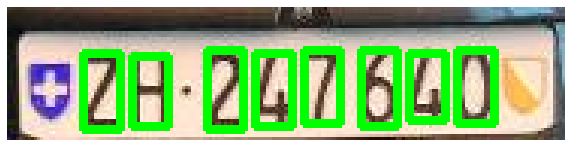

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.axis(False)
plt.imshow(test_roi)

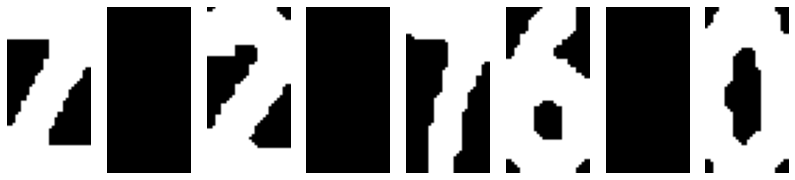

In [ ]:
fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)

for i in range(len(crop_characters)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.imshow(crop_characters[i],cmap="gray")

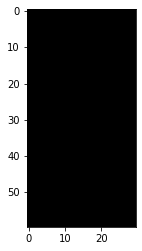

In [ ]:
plt.imshow(crop_characters[1],cmap="gray")

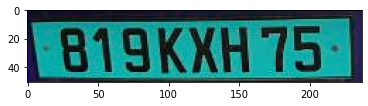

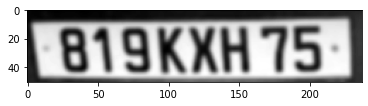

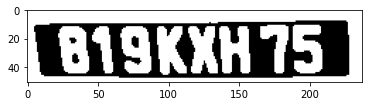

In [ ]:
from PIL import Image
import cv2 
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


## Reading the image
image_path = "/content/sub_P1010003.jpg"
img = cv2.imread(image_path)

plt.imshow(img)
plt.show()

# convert to grayscale and blur the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),0)


plt.imshow(blur, cmap="gray")
plt.show()

binary = cv2.threshold(blur, 180, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)

plt.imshow(thre_mor, cmap="gray")
plt.show()

In [ ]:
from PIL import Image
import cv2 
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array



## Reading the image
image_path = "/content/sub_P1010003.jpg"
plate_image =cv2.imread(image_path)




_, threshold = cv2.threshold(thre_mor, 110, 255, cv2.THRESH_BINARY) 

contours, _= cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 



# Create sort_contours() function to grab the contour of each digit from left to right
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# creat a copy version "test_roi" of plat_image to draw bounding box
test_roi = plate_image.copy()

# Initialize a list which will be used to append charater image
crop_characters = []

# define standard width and height of character
digit_w, digit_h = 30, 60

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=5.5: # Only select contour with defined ratio
        if h/plate_image.shape[0]>=0.5: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arroung digit number
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

            # Sperate number and gibe prediction
            curr_num = thre_mor[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)
            
print("Detect {} letters...".format(len(crop_characters)))   




Detect 0 letters...


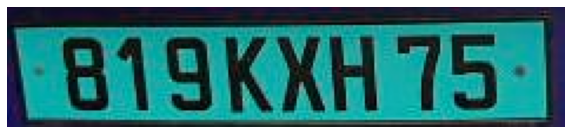

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.axis(False)
plt.imshow(test_roi)

In [ ]:
fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)

for i in range(len(crop_characters)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.imshow(crop_characters[i],cmap="gray")

<Figure size 1008x288 with 0 Axes>